## best deck yesterday

What you want:
- [x] top 10 archetypes yesterday
    - top_archetypes
- [x] the best archetype yesterday w/ winrate
    - number_one
- [x] the popular decks in that archetype w/ winrate
    - best_decks
- [ ] the mu table for that archetype
- [x] the optimal game length for that deck
- [ ] how that deck has been growing in the meta
    - [ ] in popularity
    - [ ] in winrate

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta

In [2]:
df = pd.read_csv(r'./../data/raw/lor_ranked_data_all.csv')

In [3]:
this_day = str(date.today())
yesterday = str(date.today() - timedelta(days = 8))
df_date = df[(df['game_start_time_utc'] < this_day) & (df['game_start_time_utc'] > yesterday)] # keep only the games played yesterday
df_date.shape

(424718, 14)

In [4]:
#clean data
df_small = df_date[['game_outcome', 'total_turn_count', 'archetype']]
archetypes = df_small['archetype'].value_counts() # find the unique archetypes being played
popular_archetypes = archetypes[archetypes > len(df_small)/100] #only keep popular archetypes ##################################################################################
popular_list = list(popular_archetypes.index) # make a list of popular archetypes
df_small_popular = df_small.loc[df['archetype'].isin(popular_list)] # filter df to only keep popular archetypes
df_small_popular = df_small_popular[df_small_popular['game_outcome'] != "tie"] # drop ties

In [5]:
#calculate winrate by archetype
df2 = df_small_popular.groupby(['archetype', 'game_outcome']).size() #get win/loss for major archetypes
df2 = df2.groupby(level=0).transform(lambda x: (x / x.sum()).round(2)*100) #get win/loss % for major archetypes
df2.drop('loss', level=1, axis=0, inplace=True) #drop loss %
df2 = df2.droplevel(level=1) #drop win/loss

In [6]:
#top 10 archetypes
df2.sort_values(ascending=False, inplace=True)
top_archetypes = df2[:9]
top_archetypes

archetype
Illaoi Bard                55.0
Heimerdinger Jayce (SI)    54.0
Taric Poppy (DE)           54.0
Jinx Bard                  54.0
Lissandra Taliyah          54.0
Ahri Bard                  53.0
Vi Aphelios Viktor         53.0
Fizz Riven (BC)            53.0
Renekton Akshan (BC)       53.0
dtype: float64

In [7]:
#best archetype yesterday
number_one = df2.index[0]

In [8]:
x = df_date.loc[df_date['archetype'] == df2.index[0]]
archetypes = x['deck_code'].value_counts() # find the unique archetypes being played
archetypes = archetypes[archetypes > 150] #only keep popular archetypes
popular_list = list(archetypes.index) # make a list of popular archetypes
x = x.loc[df['deck_code'].isin(popular_list)] # filter df to only keep popular archetypes

In [9]:
df_champ = x.groupby(['deck_code', 'game_outcome']).size() #get win/loss for major archetypes
df_champ = df_champ.groupby(level=0).transform(lambda x: (x / x.sum()).round(2)*100) #get win/loss % for major archetypes
df_champ.drop('loss', level=1, axis=0, inplace=True) #drop loss %
df_champ = df_champ.droplevel(level=1) #drop win/loss

In [10]:
best_decks = df_champ.sort_values(ascending=False)
best_decks = best_decks[:3]
best_decks

deck_code
CUCQCBQKDIAQMCI5AEDAYAICAIDAKJQFAYDAMBY4DYRQGAIDAYEAEAQGAEWQEBQGB4WQA         62.0
CUDACAYGBAAQMCQ2AEDASHIBAYGACAQCAYAQKBIGAYDAOHA6EMBACBQKFQBAMBQPFUAQCAQGFU    59.0
CUDACAYGBAAQMCQ2AEDASHIBAYGACAQCAYAQKBQGAYDAODY4DYRQEAIGBIWACBQGFUAA          59.0
dtype: float64

## the optimal game length for that archetype

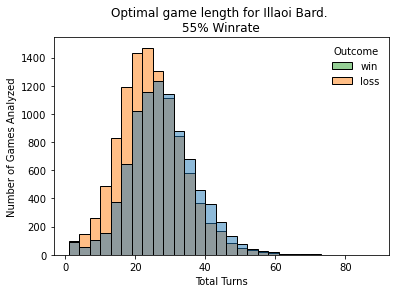

In [11]:
thing = [top_archetypes.index[0]]
df_x = df_small.loc[(df_small['archetype'].isin(thing))]
winrate = int(df2.at[top_archetypes.index[0]])
plt.figure()
sns.histplot(x=df_x['total_turn_count'], hue=df_small['game_outcome'], bins=30, binwidth=3)
plt.title(f'Optimal game length for {top_archetypes.index[0]}. \n{winrate}% Winrate')
plt.xlabel('Total Turns')
plt.ylabel('Number of Games Analyzed')
plt.legend(title="Outcome", labels=['win', 'loss'], frameon=False)

##  how that deck has been growing in the meta
 - in popularity
 - in winrate

<AxesSubplot:title={'center':'How has popularity changed for Illaoi Bard? \n55% Winrate overall'}, xlabel='Date', ylabel='Number of Games'>

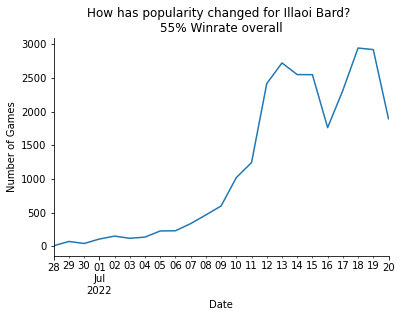

In [12]:
df_x = df[df['archetype'] == df2.index[0]] # make dataframe of just the best archetype
thing = pd.to_datetime(df_x['game_start_time_utc'].str[:10]) # just get the dates
dates = thing.value_counts() # how many games are played per day?
dates.sort_index(ascending=True, inplace=True) # sort the dates

fig, ax = plt.subplots() # graph to see if you're missing any dates
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title(f'How has popularity changed for {df2.index[0]}? \n{winrate}% Winrate overall')
plt.xlabel('Date')
plt.ylabel('Number of Games')
dates.plot(ax=ax, kind='line')

<AxesSubplot:title={'center':"How has popularity for yesterday's top deck changed? \n62% winrate yesterday"}, xlabel='Date', ylabel='Number of Games'>

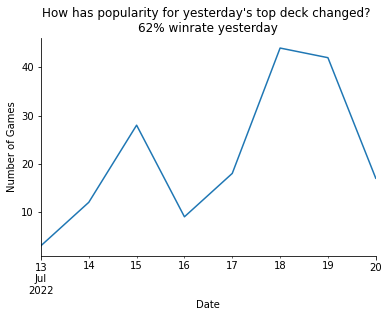

In [13]:
df_x = df[df['deck_code'] == best_decks.index[0]] # make dataframe of just the best deck
thing = pd.to_datetime(df_x['game_start_time_utc'].str[:10]) # just get the dates
dates = thing.value_counts() # how many games are played per day?
dates.sort_index(ascending=True, inplace=True) # sort the dates

fig, ax = plt.subplots() # graph to see if you're missing any dates
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title(f'How has popularity for yesterday\'s top deck changed? \n{round(best_decks[0])}% winrate yesterday')
plt.xlabel('Date')
plt.ylabel('Number of Games')
dates.plot(ax=ax, kind='line')

## generate report

In [14]:
# make png for top archetypes
_archetypes = pd.DataFrame(top_archetypes, columns=['winrate']) #convert top_archetypes to dataframe
_archetypes.reset_index(inplace=True) # reset df index
df_styled = _archetypes.style.background_gradient()
dfi.export(df_styled,"top_archetypes_winrate.png")

NameError: name 'dfi' is not defined

In [ ]:
#make variables for top decks
deck_0 = best_decks.index[0]
deck_wr_0 = round(best_decks[0])
deck_1 = best_decks.index[1]
deck_wr_1 = round(best_decks[1])
deck_2 = best_decks.index[2]
deck_wr_2 = round(best_decks[2])

In [ ]:
pdf = FPDF()

w = 210
h = 297

pdf.add_page()
pdf.set_text_color(50,50,50)
pdf.set_fill_color(252, 237, 218)
pdf.rect(0, 0, 210, 297, 'F')

# logo
pdf.image('logo.png', w-24, 1, w/8)

#title
pdf.set_font('Arial', 'B', 25)
pdf.ln(10)
pdf.write(5,f'What was the best deck on {pdf_yesterday}?')

#top archetypes
pdf.set_font('Arial', 'B', 10)
pdf.ln(5)
pdf.write(10,f'I analyzed {df_date.shape[0]} games to discover yesterday\'s top-performing archetypes and decks.')
#png of top 10
pdf.set_font('Arial', 'B', 15)
pdf.ln(10)
pdf.write(10,f'{df2.index[0]} is yesterday\'s top archetype.')
pdf.image("top_archetypes_winrate.png", w/2-20, 50, w/3.5)

# top decks
pdf.ln(100)
pdf.set_font('Arial', 'B', 15)
pdf.write(10,f'Here are the best decks in the {df2.index[0]} archetype:')
pdf.ln(10)
pdf.set_font('Arial', 'B', 7.5)
pdf.write(10,f'{deck_wr_0}% wr | {deck_0} \n{deck_wr_1}% wr | {deck_1} \n{deck_wr_2}% wr | {deck_2}')
# pdf.write(10,f'{deck_wr_0}% wr | {deck_0} \n{deck_wr_1}% wr | {deck_1}')#' \n{deck_wr_2}% wr | {deck_2}')
# pdf.write(10,f'{deck_wr_0}% wr | {deck_0}')#' \n{deck_wr_1}% wr | {deck_1} \n{deck_wr_2}% wr | {deck_2}')
pdf.ln(10)
pdf.set_font('Arial', 'B', 6)
pdf.write(7,f'\t\t\t\t\t\t\t\t\t\t\t\t\t*Each deck must have at least 100 wins to be considered.')

#optimal game length
pdf.ln(10)
pdf.set_font('Arial', 'B', 15)
pdf.write(10,'This archetype and this deck have been good for a while now.')
pdf.image('archetypePopularity.png', 10, h-95, w/2.2)

#optimal game length
# pdf.ln(10)
# pdf.set_font('Arial', 'B', 15)
# pdf.write(0,'Has this deck always been popular?')
pdf.image('deckPopularity.png', w/2, h-95, w/2.2)

#export
pdf.output(f'{pdf_yesterday}.pdf', 'F')

In [ ]:
print(f'{top_archetypes.index[0]} is yesterday\'s best deck with a {top_archetypes[0]}% overall winrate. \
      \nOut of {df_date.shape[0]} matches analyzed, {top_archetypes.index[0]} was played {n_plays} times with an overall {top_archetypes[0]}% winrate. \
      \n\n|Winrate|Deck Code|\
      \n|:-|:-| \
      \n|{deck_wr_0}%|{deck_0}| \
      \n|{deck_wr_1}%|{deck_1}|  \
      \n|{deck_wr_2}%|{deck_2}|\
      \n\nHappy climbing, and all hail Balco for the data!')